# GAFA stock prices prediction

Plan<br>
1. Introduction<p>

2. Data sources & Exploratory analysis<br>
  2.1. GAFA stock prices 2013-Q1 2019<br>
  2.2. GAFA Market Capitalisation 2013-Q1 2019<br>
  2.3. Data cleaning <br>
  2.4. GAFA Web&Mobile users in the world 2013-Q1 2019<p>
    
3. Stock prices predictive modelling<br>
  3.1. Features engineering<br>
  3.2. Linear Regression<br>
  3.3. KNN<br>
  3.4. Prophet<p>
    
4. Conclusion


## Introduction

<b>GAFA</b> - four leading world internet companies - <b>Google(Alphabet), Apple, Facebook, Amazon</b> has grown rapidly during several last years and become one of the most 

This project is focused on analysing and prediction stock prices for these companies.

Multiple stock predictive models that actually can be found and consulted are based mostly on historical stock prices. In this project predictive models are developped using several data sets from various sources.

<b>Data sources:</b><br>
1. Stock information: Daily GAFA stock prices and volume.
2. Stock information: Daily stock Indexes prices and volume.
3. GAFA financial data: Daily Market Capitalisation.
4. Market data: Number of Internet & Mobile users in the world by regions. The succes of these companies is due also to the growth of internet&web users, so it seems reasonable to take into account these data to develop predictive models.

 



## Data sources and exploratory analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set()


### GAFA stock data download

In [2]:
# Download Google stock prices into Pandas DataFrame

df_G = pd.read_csv('GOOG_daily_2013_2019.csv')
df_G = df_G[['Date', 'Close', 'Volume']].set_index('Date')
df_G.rename(columns={'Close':'Close Google', 'Volume':'Volume Google'}, inplace=True)
df_G.index = pd.to_datetime(df_G.index)
print(df_G.head())
print(df_G.tail())


# Download Apple stock prices into Pandas DataFrame

df_AP = pd.read_csv('AAPL_daily_2013-2019.csv')

df_AP = df_AP[['Date', 'Close', 'Volume']].set_index('Date')
df_AP.rename(columns={'Close':'Close Apple', 'Volume':'Volume Apple'}, inplace=True)
df_AP.index = pd.to_datetime(df_AP.index)
print(df_AP.head())
print(df_AP.tail())


            Close Google  Volume Google
Date                                   
2013-01-02    359.288177        5115500
2013-01-03    359.496826        4666500
2013-01-04    366.600616        5562800
2013-01-07    365.001007        3332900
2013-01-08    364.280701        3373900
            Close Google  Volume Google
Date                                   
2019-04-24   1256.000000        1018800
2019-04-25   1263.449951        1107300
2019-04-26   1272.180054        1241400
2019-04-29   1287.579956        2499400
2019-04-30   1188.479980        6207000
            Close Apple  Volume Apple
Date                                 
2013-01-02    78.432854     140129500
2013-01-03    77.442856      88241300
2013-01-04    75.285713     148583400
2013-01-07    74.842857     121039100
2013-01-08    75.044289     114676800
            Close Apple  Volume Apple
Date                                 
2019-04-24   207.160004      17540600
2019-04-25   205.279999      18543200
2019-04-26   204.30000

In [3]:
# Download  Facebook stock prices into Pandas DataFrame

df_FB = pd.read_csv('FB_daily_2013_2019.csv')
df_FB = df_FB[['Date', 'Close', 'Volume']].set_index('Date')
df_FB.rename(columns={'Close':'Close FB', 'Volume':'Volume FB'}, inplace=True)
df_FB.index = pd.to_datetime(df_FB.index)
print(df_FB.head())
print(df_FB.tail())

# Download Amazon stock prices into Pandas DataFrame

df_AMZ = pd.read_csv('AMZN_daily_2013-2019.csv')
df_AMZ = df_AMZ[['Date', 'Close', 'Volume']].set_index('Date')
df_AMZ.index = pd.to_datetime(df_AMZ.index)
df_AMZ.rename(columns={'Close':'Close Amazon', 'Volume':'Volume Amazon'}, inplace=True)
print(df_AMZ.head())
print(df_AMZ.tail())

             Close FB  Volume FB
Date                            
2013-01-02  28.000000   69846400
2013-01-03  27.770000   63140600
2013-01-04  28.760000   72715400
2013-01-07  29.420000   83781800
2013-01-08  29.059999   45871300
              Close FB  Volume FB
Date                             
2019-04-24  182.580002   37289900
2019-04-25  193.259995   54148800
2019-04-26  191.490005   22075000
2019-04-29  194.779999   19641300
2019-04-30  193.399994   23494700
            Close Amazon  Volume Amazon
Date                                   
2013-01-02    257.309998        3271000
2013-01-03    258.480011        2750900
2013-01-04    259.149994        1874200
2013-01-07    268.459991        4910000
2013-01-08    266.380005        3010700
            Close Amazon  Volume Amazon
Date                                   
2019-04-24   1901.750000        3675800
2019-04-25   1902.250000        6099100
2019-04-26   1950.630005        8432600
2019-04-29   1938.430054        4021300
2019-04-30 

### GAFA stock price exploratory analysis

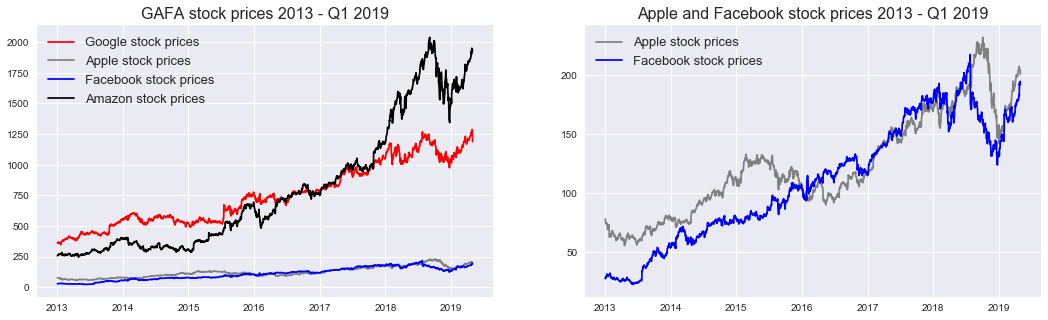

In [4]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.plot(df_G['Close Google'], 'r-', label='Google stock prices')
plt.plot(df_AP['Close Apple'], color='grey',label='Apple stock prices')
plt.plot(df_FB['Close FB'], 'b-', label='Facebook stock prices')
plt.plot(df_AMZ['Close Amazon'], color='black', label='Amazon stock prices')
plt.title('GAFA stock prices 2013 - Q1 2019', fontsize=16)
plt.legend(fontsize=13)



plt.subplot(1,2,2)
plt.plot(df_AP['Close Apple'], color='grey',label='Apple stock prices')
plt.plot(df_FB['Close FB'], 'b-', label='Facebook stock prices')
plt.title('Apple and Facebook stock prices 2013 - Q1 2019', fontsize=16)
plt.legend(fontsize=13)
plt.show()

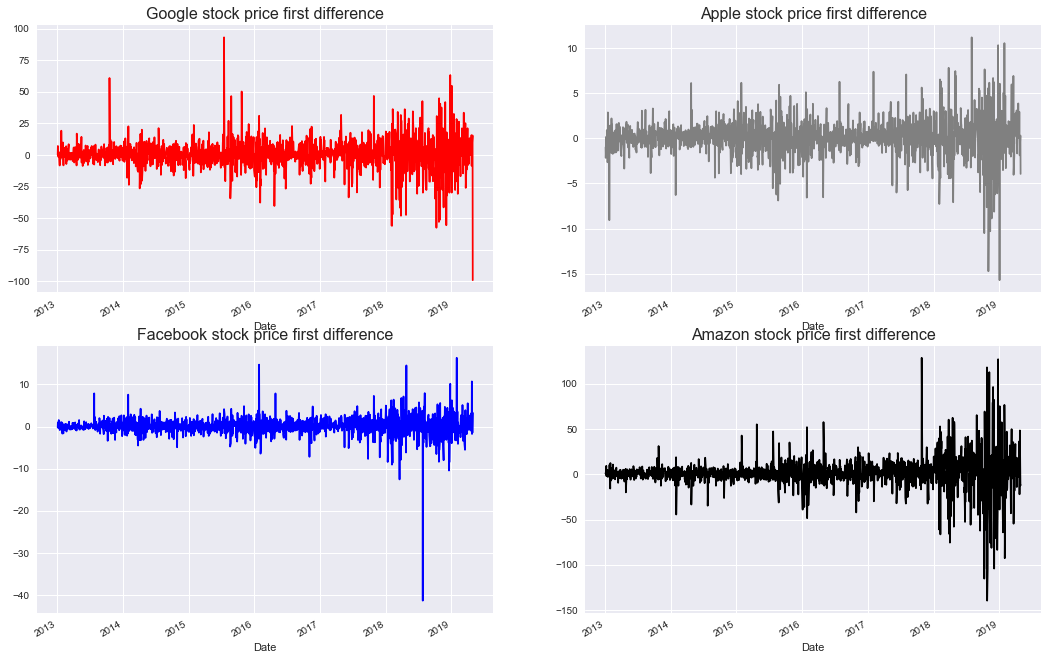

In [5]:
#Visualize daily stock price difference

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
diff_G = df_G['Close Google'] - df_G['Close Google'].shift(1) #difference between currant value and previous value
diff_G.plot(color = 'red')
plt.title('Google stock price first difference', fontsize=16)

plt.subplot(2,2,2)
diff_AP = df_AP['Close Apple'] - df_AP['Close Apple'].shift(1)
diff_AP.plot(color = 'grey')
plt.title('Apple stock price first difference', fontsize=16)

plt.subplot(2,2,3)
diff_FB = df_FB['Close FB'] - df_FB['Close FB'].shift(1)
diff_FB.plot( color = 'blue')
plt.title('Facebook stock price first difference', fontsize=16)

plt.subplot(2,2,4)
diff_AMZ = df_AMZ['Close Amazon'] - df_AMZ['Close Amazon'].shift(1)
diff_AMZ.plot( color = 'black')
plt.title('Amazon stock price first difference', fontsize=16)

plt.show()

Points are centered around 0. Where variance increses a lot that can indicate that the data is exponentially increasing

### Indexes data download

In [6]:
# S&P 500 index

df_SP = pd.read_csv('GSPC_daily_2013-2019.csv')
df_SP.head()
df_SP = df_SP[['Date', 'Close', 'Volume']].set_index('Date')
df_SP.rename(columns={'Close':'Close S&P 500', 'Volume':'Volume S&P500'}, inplace=True)
df_SP.index = pd.to_datetime(df_SP.index)
print(df_SP.head())
print(df_SP.tail())


# Dow Jones Index

df_DJ = pd.read_csv('DJI_2013_2019.csv')
df_DJ = df_DJ[['Date', 'Close', 'Volume']].set_index('Date')
df_DJ.rename(columns={'Close':'Close DJ', 'Volume':'Volume DJ'}, inplace=True)
df_DJ.index = pd.to_datetime(df_DJ.index)
print(df_DJ.head())
print(df_DJ.tail())


#Nasdaq index

df_ND = pd.read_csv('IXIC_daily_2013-2019.csv')
df_ND = df_ND[['Date', 'Close', 'Volume']].set_index('Date')
df_ND.rename(columns={'Close':'Close ND', 'Volume':'Volume ND'}, inplace=True)
df_ND.index = pd.to_datetime(df_ND.index)
print(df_ND.head())
print(df_ND.tail())


            Close S&P 500  Volume S&P500
Date                                    
2013-01-02    1462.420044     4202600000
2013-01-03    1459.369995     3829730000
2013-01-04    1466.469971     3424290000
2013-01-07    1461.890015     3304970000
2013-01-08    1457.150024     3601600000
            Close S&P 500  Volume S&P500
Date                                    
2019-04-24    2927.250000     3448960000
2019-04-25    2926.169922     3425280000
2019-04-26    2939.879883     3248500000
2019-04-29    2943.030029     3118780000
2019-04-30    2945.830078     3919330000
                Close DJ  Volume DJ
Date                               
2013-01-02  13412.549805  161430000
2013-01-03  13391.360352  129630000
2013-01-04  13435.209961  107590000
2013-01-07  13384.290039  113120000
2013-01-08  13328.849609  129570000
                Close DJ  Volume DJ
Date                               
2019-04-24  26597.050781  283370000
2019-04-25  26462.080078  296730000
2019-04-26  26543.330078  3172

### Indexes  price exploratory analysis

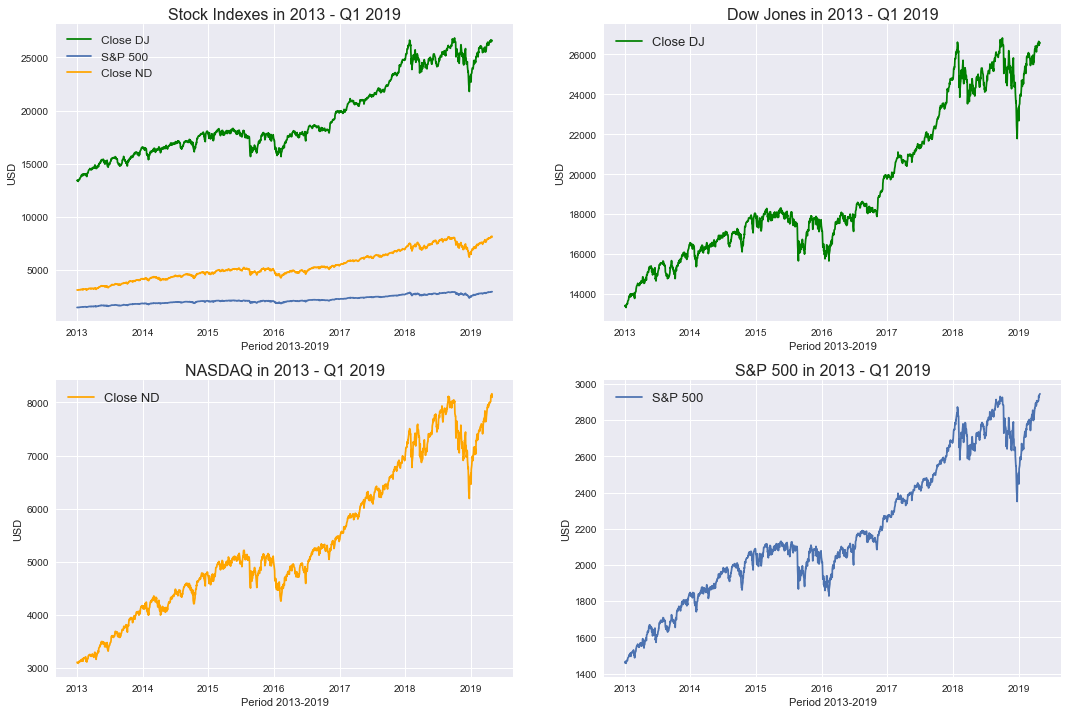

In [7]:
#Stock prices visualisation 

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.plot(df_DJ['Close DJ'], color = 'green')
plt.plot(df_SP['Close S&P 500'], label = 'S&P 500')
plt.plot(df_ND['Close ND'], color = 'orange') 
plt.xlabel('Period 2013-2019')
plt.ylabel('USD')
plt.title('Stock Indexes in 2013 - Q1 2019', fontsize=16)
plt.legend(fontsize=12)

plt.subplot(2,2,2)
plt.plot(df_DJ['Close DJ'], color = 'green') 
plt.xlabel('Period 2013-2019')
plt.ylabel('USD')
plt.legend(fontsize=13)
plt.title('Dow Jones in 2013 - Q1 2019', fontsize=16)

plt.subplot(2,2,3)
plt.plot(df_ND['Close ND'], color = 'orange')  
plt.xlabel('Period 2013-2019')
plt.ylabel('USD')
plt.legend(fontsize=13)
plt.title('NASDAQ in 2013 - Q1 2019', fontsize=16)

plt.subplot(2,2,4)
plt.plot(df_SP['Close S&P 500'], label = 'S&P 500')
plt.xlabel('Period 2013-2019')
plt.ylabel('USD')
plt.title('S&P 500 in 2013 - Q1 2019', fontsize=16)
plt.legend(fontsize=13)
plt.show()


While absolute value of indexes is different, we can see of plot that pattern is seemed to be very similar


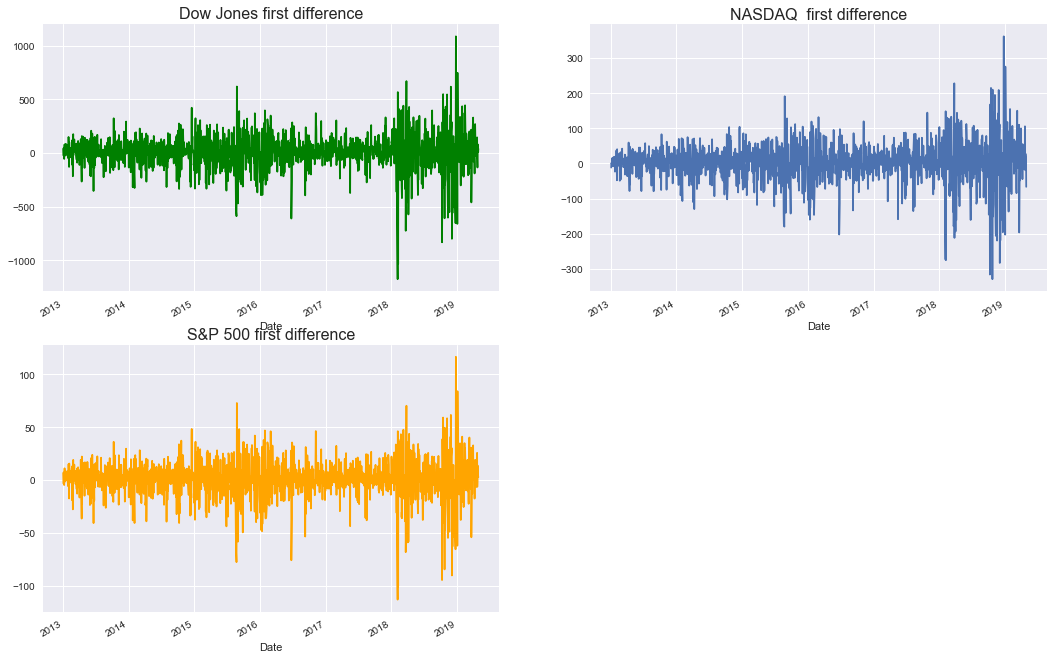

In [8]:
#Visualize Indexes daily stock price difference

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
diff_DJ = df_DJ['Close DJ'] - df_DJ['Close DJ'].shift(1) #difference between currant value and previous value
diff_DJ.plot(color = 'green')
plt.title('Dow Jones first difference', fontsize=16)

plt.subplot(2,2,2)
diff_ND = df_ND['Close ND'] - df_ND['Close ND'].shift(1)
diff_ND.plot()
plt.title('NASDAQ  first difference', fontsize=16)

plt.subplot(2,2,3)
diff_SP = df_SP['Close S&P 500'] - df_SP['Close S&P 500'].shift(1)
diff_SP.plot( color = 'orange')
plt.title('S&P 500 first difference', fontsize=16)


plt.show()

Here again we can see that idexes have quite similar behavoir

In [9]:
#Concatenate data frames in one

df = pd.concat([df_AP, df_AMZ, df_FB, df_G, df_SP, df_DJ, df_ND], axis=1)
df.index = pd.to_datetime(df.index)
print(df.shape)
df.head()


(1592, 14)


,Close Apple,Volume Apple,Close Amazon,Volume Amazon,Close FB,Volume FB,Close Google,Volume Google,Close S&P 500,Volume S&P500,Close DJ,Volume DJ,Close ND,Volume ND
Date,,,,,,,,,,,,,,
2013-01-02,78.432854,140129500,257.309998,3271000,28.000000,69846400,359.288177,5115500,1462.420044,4202600000,13412.549805,161430000,3112.260010,2111300000
2013-01-03,77.442856,88241300,258.480011,2750900,27.770000,63140600,359.496826,4666500,1459.369995,3829730000,13391.360352,129630000,3100.570068,1769420000
2013-01-04,75.285713,148583400,259.149994,1874200,28.760000,72715400,366.600616,5562800,1466.469971,3424290000,13435.209961,107590000,3101.659912,1745140000
2013-01-07,74.842857,121039100,268.459991,4910000,29.420000,83781800,365.001007,3332900,1461.890015,3304970000,13384.290039,113120000,3098.810059,1702540000
2013-01-08,75.044289,114676800,266.380005,3010700,29.059999,45871300,364.280701,3373900,1457.150024,3601600000,13328.849609,129570000,3091.810059,1744380000


### Market Capitalisation data

In [10]:
# Google daily capitalisation data

df_G_cap = pd.read_csv('GOOG_market_cap_data.csv')
print(df_G_cap.shape)
df_G_cap.sort_values(by = 'Period', ascending=True, inplace=True )
df_G_cap.set_index('Period', inplace=True)
df_G_cap.index = pd.to_datetime(df_G_cap.index)
df_G_cap.rename(columns={'Market Cap':'Market Cap_Google'}, inplace=True)
print(df_G_cap.head())


# Apple daily capitalisation data

df_AP_cap = pd.read_csv('AAPL_market_cap_data.csv')
print(df_AP_cap.shape)
df_AP_cap.sort_values(by = 'Period', ascending=True, inplace=True )
df_AP_cap.set_index('Period', inplace=True)
df_AP_cap.index = pd.to_datetime(df_AP_cap.index)
df_AP_cap.rename(columns={'Market Cap':'Market Cap_APPLE'}, inplace=True)
print(df_AP_cap.head())


# Facebook daily capitalisation data

df_FB_cap = pd.read_csv('FB_market_cap_data.csv')
print(df_FB_cap.shape)
df_FB_cap.sort_values(by = 'Period', ascending=True, inplace=True )
df_FB_cap.set_index('Period', inplace=True)
df_FB_cap.index = pd.to_datetime(df_FB_cap.index)
df_FB_cap.rename(columns={'Market Cap':'Market Cap_FB'}, inplace=True)
print(df_FB_cap.head())


# Amazon daily capitalisation data

df_AMZ_cap = pd.read_csv('AMZN_market_cap_data.csv')
print(df_AMZ_cap.shape)
df_AMZ_cap.sort_values(by = 'Period', ascending=True, inplace=True )
df_AMZ_cap.set_index('Period', inplace=True)
df_AMZ_cap.index = pd.to_datetime(df_AMZ_cap.index)
df_AMZ_cap.rename(columns={'Market Cap':'Market Cap_AMZN'}, inplace=True)
print(df_AMZ_cap.head())

(1592, 2)
            Market Cap_Google
Period                       
2013-01-02        238426.3057
2013-01-03        238564.7561
2013-01-04        243278.8851
2013-01-07        242217.3911
2013-01-08        241739.3847
(1592, 2)
            Market Cap_APPLE
Period                      
2013-01-02       515560.3722
2013-01-03       509048.9501
2013-01-04       494873.3253
2013-01-07       491962.3066
2013-01-08       493286.3538
(1588, 2)
            Market Cap_FB
Period                   
2013-01-02      66416.000
2013-01-03      65870.440
2013-01-04      68218.720
2013-01-07      69787.326
2013-01-08      68931.978
(1592, 2)
            Market Cap_AMZN
Period                     
2013-01-02      116818.7400
2013-01-03      117349.9245
2013-01-04      117654.1000
2013-01-07      121880.4768
2013-01-08      120936.5200


In [11]:
rolling_g = df_G_cap.rolling(365, center=True)

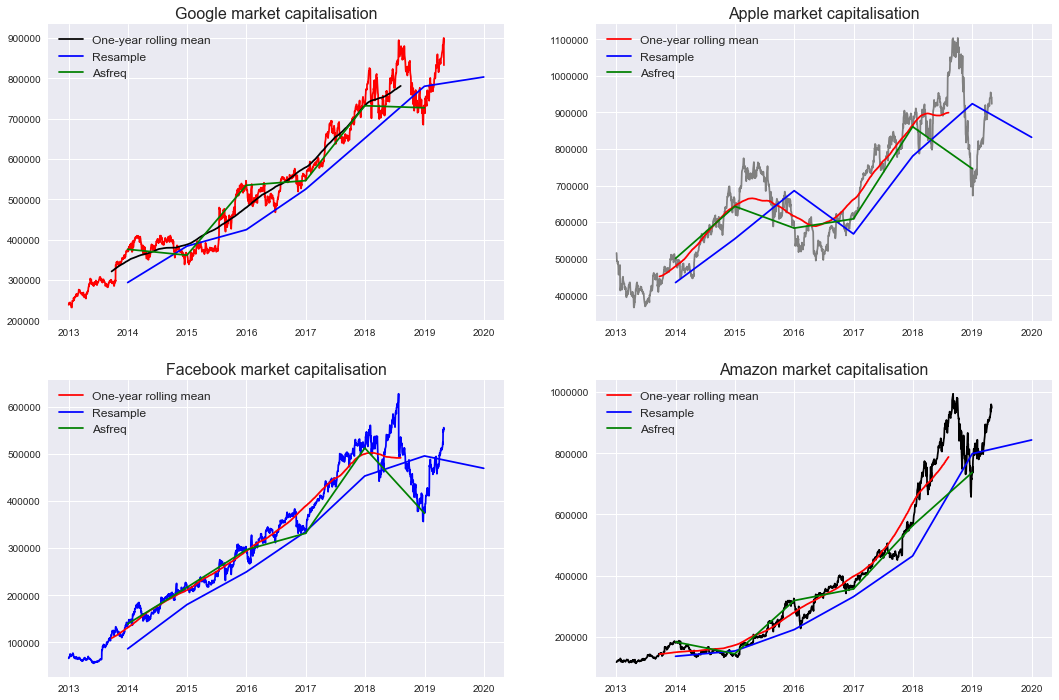

In [12]:


# Market capitalisation data visualization

plt.figure(figsize=(18,12))

# Google 
plt.subplot(2,2,1)
plt.plot(df_G_cap, color='red')

rolling_g = df_G_cap.rolling(365, center=True)
resampling_g = df_G_cap.resample('BA')
freq_g = df_G_cap.asfreq('BA')

plt.plot(rolling_g.mean(), color='black', label = 'One-year rolling mean')
plt.plot(resampling_g.mean(), color='blue', label = 'Resample')
plt.plot(freq_g, color='green', label = 'Asfreq')

plt.legend(fontsize=12)
plt.title('Google market capitalisation', fontsize=16)


# Apple
plt.subplot(2,2,2)
plt.plot(df_AP_cap, color='grey')

rolling_ap = df_AP_cap.rolling(365, center=True)
resampling_ap = df_AP_cap.resample('BA')
freq_ap = df_AP_cap.asfreq('BA')

plt.plot(rolling_ap.mean(), color='red', label = 'One-year rolling mean')
plt.plot(resampling_ap.mean(), color='blue', label = 'Resample')
plt.plot(freq_ap, color='green', label = 'Asfreq')

plt.legend(fontsize=12)
plt.title('Apple market capitalisation', fontsize=16)

# Facebook 
plt.subplot(2,2,3)
plt.plot(df_FB_cap, color='blue')

rolling_fb = df_FB_cap.rolling(365, center=True)
resampling_fb = df_FB_cap.resample('BA')
freq_fb = df_FB_cap.asfreq('BA')

plt.plot(rolling_fb.mean(), color='red', label = 'One-year rolling mean')
plt.plot(resampling_fb.mean(), color='blue', label = 'Resample')
plt.plot(freq_fb, color='green', label = 'Asfreq')

plt.legend(fontsize=12)
plt.title('Facebook market capitalisation', fontsize=16)

# Amazon daily capitalisation data 
plt.subplot(2,2,4)
plt.plot(df_AMZ_cap, color='black')

rolling_am = df_AMZ_cap.rolling(365, center=True)
resampling_am = df_AMZ_cap.resample('BA')
freq_am = df_AMZ_cap.asfreq('BA')

plt.plot(rolling_am.mean(), color='red', label = 'One-year rolling mean')
plt.plot(resampling_am.mean(), color='blue', label = 'Resample')
plt.plot(freq_am, color='green', label = 'Asfreq')

plt.legend(fontsize=12)
plt.title('Amazon market capitalisation', fontsize=16)
plt.show()

In [13]:
#Concatenate Market Capitalisation data

df_cap = pd.concat([df_G_cap, df_AP_cap, df_FB_cap, df_AMZ_cap], axis=1)
df_cap.head()

,Market Cap_Google,Market Cap_APPLE,Market Cap_FB,Market Cap_AMZN
Period,,,,
2013-01-02,238426.3057,515560.3722,66416.000,116818.7400
2013-01-03,238564.7561,509048.9501,65870.440,117349.9245
2013-01-04,243278.8851,494873.3253,68218.720,117654.1000
2013-01-07,242217.3911,491962.3066,69787.326,121880.4768
2013-01-08,241739.3847,493286.3538,68931.978,120936.5200


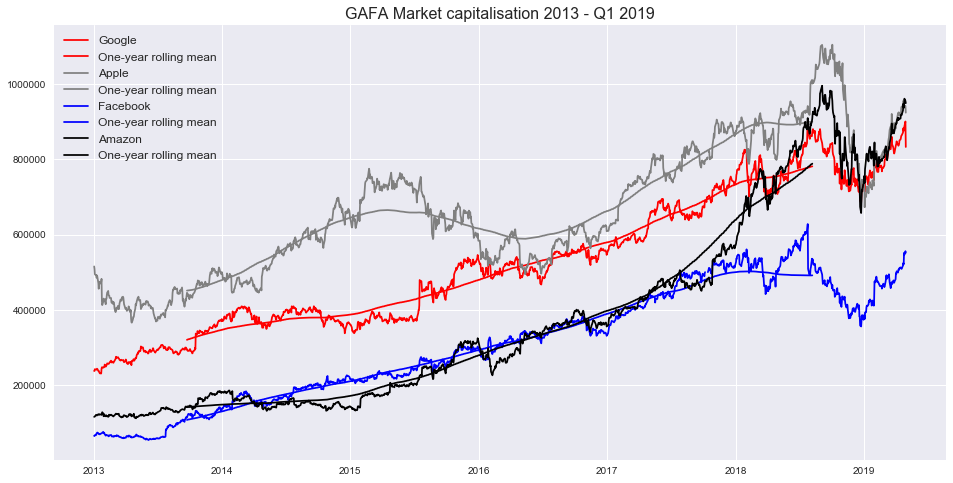

In [14]:
# GAFA daily capitalisation data visualization

plt.figure(figsize=(16,8))
plt.plot(df_cap['Market Cap_Google'], label ='Google', color='red')
plt.plot(rolling_g.mean(), color='red', label = 'One-year rolling mean')

plt.plot(df_cap['Market Cap_APPLE'], label ='Apple', color='grey')
plt.plot(rolling_ap.mean(), color='grey', label = 'One-year rolling mean')

plt.plot(df_cap['Market Cap_FB'], label ='Facebook', color='blue')
plt.plot(rolling_fb.mean(), color='blue', label = 'One-year rolling mean')

plt.plot(df_cap['Market Cap_AMZN'], label ='Amazon', color='black')
plt.plot(rolling_am.mean(), color='black', label = 'One-year rolling mean')

plt.title('GAFA Market capitalisation 2013 - Q1 2019', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [15]:
#Concatenate stock prices and capitalisation data frames

df = pd.concat([df, df_cap], axis=1)
print(df.shape)
df.tail()

(1593, 18)


,Close Apple,Volume Apple,Close Amazon,Volume Amazon,Close FB,Volume FB,Close Google,Volume Google,Close S&P 500,Volume S&P500,Close DJ,Volume DJ,Close ND,Volume ND,Market Cap_Google,Market Cap_APPLE,Market Cap_FB,Market Cap_AMZN
2019-04-24,207.160004,17540600.0,1901.750000,3675800.0,182.580002,37289900.0,1256.000000,1018800.0,2927.250000,3.448960e+09,26597.050781,283370000.0,8102.009766,2.022490e+09,874781.9002,953158.6970,521172.5468,936292.0006
2019-04-25,205.279999,18543200.0,1902.250000,6099100.0,193.259995,54148800.0,1263.449951,1107300.0,2926.169922,3.425280e+09,26462.080078,296730000.0,8118.680176,2.063270e+09,879842.9375,944508.6760,551658.4862,936538.1666
2019-04-26,204.300003,18649100.0,1950.630005,8432600.0,191.490005,22075000.0,1272.180054,1241400.0,2939.879883,3.248500e+09,26543.330078,317290000.0,8146.399902,1.971270e+09,886840.9150,939999.6225,546606.0412,960357.1790
2019-04-29,204.610001,22204700.0,1938.430054,4021300.0,194.779999,19641300.0,1287.579956,2499400.0,2943.030029,3.118780e+09,26554.390625,279450000.0,8161.850098,1.761110e+09,899878.8136,941425.9558,555997.3090,954350.7311
2019-04-30,200.669998,46534900.0,1926.520020,3506000.0,193.399994,23494700.0,1188.479980,6207000.0,2945.830078,3.919330e+09,26592.910156,340320000.0,8095.390137,2.115770e+09,832370.5464,923297.7202,552058.1146,948487.0593


### Cleaning dataset

In [16]:
print(df.shape)
print(df.info())
df.isnull().sum()

(1593, 18)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1593 entries, 2013-01-02 to 2019-04-30
Data columns (total 18 columns):
Close Apple          1592 non-null float64
Volume Apple         1592 non-null float64
Close Amazon         1592 non-null float64
Volume Amazon        1592 non-null float64
Close FB             1592 non-null float64
Volume FB            1592 non-null float64
Close Google         1592 non-null float64
Volume Google        1592 non-null float64
Close S&P 500        1592 non-null float64
Volume S&P500        1592 non-null float64
Close DJ             1592 non-null float64
Volume DJ            1592 non-null float64
Close ND             1592 non-null float64
Volume ND            1592 non-null float64
Market Cap_Google    1592 non-null float64
Market Cap_APPLE     1592 non-null float64
Market Cap_FB        1588 non-null float64
Market Cap_AMZN      1592 non-null float64
dtypes: float64(18)
memory usage: 236.5 KB
None


Close Apple          1
Volume Apple         1
Close Amazon         1
Volume Amazon        1
Close FB             1
Volume FB            1
Close Google         1
Volume Google        1
Close S&P 500        1
Volume S&P500        1
Close DJ             1
Volume DJ            1
Close ND             1
Volume ND            1
Market Cap_Google    1
Market Cap_APPLE     1
Market Cap_FB        5
Market Cap_AMZN      1
dtype: int64

In [17]:
# Look for missing values and localize it in dataset

df['Close Apple'][df['Close Apple'].isnull()]
df['Close Apple']['2017-10-12':'2017-10-16']

2017-10-12    156.000000
2017-10-13    156.990005
2017-10-14           NaN
2017-10-16    159.880005
Name: Close Apple, dtype: float64

In [18]:
# Look for NaN values in another column
df['Volume Amazon'][df['Volume Amazon'].isnull()]

2017-10-14   NaN
Name: Volume Amazon, dtype: float64

In [19]:
# Here we can see all missing values in data set
df['2017-10-06':'2017-10-16']

,Close Apple,Volume Apple,Close Amazon,Volume Amazon,Close FB,Volume FB,Close Google,Volume Google,Close S&P 500,Volume S&P500,Close DJ,Volume DJ,Close ND,Volume ND,Market Cap_Google,Market Cap_APPLE,Market Cap_FB,Market Cap_AMZN
2017-10-06,155.300003,17407600.0,989.580017,3782100.0,172.229996,13124500.0,978.890015,1173900.0,2549.330078,2.884570e+09,22773.669922,221450000.0,6590.180176,1.742470e+09,690371.1356,796099.0153,500500.38,476977.56
2017-10-09,155.839996,16262900.0,990.989990,2938600.0,172.500000,14570400.0,977.000000,891400.0,2544.729980,2.483970e+09,22761.070313,310770000.0,6579.729980,1.490620e+09,689447.0649,798867.1638,NaN,477657.18
2017-10-10,155.899994,15617000.0,987.200012,3084900.0,171.589996,11341100.0,972.599976,968400.0,2550.639893,2.960500e+09,22830.679688,319270000.0,6587.250000,1.799400e+09,686313.5620,799174.7359,NaN,475830.40
2017-10-11,156.550003,16905600.0,995.000000,2337100.0,172.740005,11283700.0,989.250000,1693300.0,2555.239990,2.976090e+09,22872.890625,316000000.0,6603.549805,1.830360e+09,698715.5635,802506.7666,NaN,479590.00
2017-10-12,156.000000,16125100.0,1000.929993,4067300.0,172.550003,10351000.0,987.830017,1262400.0,2550.929932,3.151510e+09,22841.009766,291790000.0,6591.509766,2.000470e+09,698715.5635,799687.3560,NaN,482448.26
2017-10-13,156.990005,16394200.0,1002.940002,2431500.0,173.740005,13658300.0,989.679993,1169800.0,2553.169922,3.149440e+09,22871.720703,259560000.0,6605.799805,1.756150e+09,700257.9973,804762.2950,NaN,483417.08
2017-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500500.38,NaN
2017-10-16,159.880005,24121500.0,1006.340027,2008900.0,174.520004,11498800.0,992.000000,910500.0,2557.639893,2.916020e+09,22956.960938,247180000.0,6624.000000,1.629480e+09,701286.2865,819577.0159,507155.12,485055.88


In [20]:
#fill in missind data in 'Market Cap_FB' column

df['Market Cap_FB'].fillna(value=500500.38, inplace=True)
df['2017-10-06':'2017-10-16']['Market Cap_FB']

2017-10-06    500500.38
2017-10-09    500500.38
2017-10-10    500500.38
2017-10-11    500500.38
2017-10-12    500500.38
2017-10-13    500500.38
2017-10-14    500500.38
2017-10-16    507155.12
Name: Market Cap_FB, dtype: float64

In [21]:
#drop the row with NaN values
df.dropna(inplace=True)

#check if the row was deleted
df['2017-10-12':'2017-10-17']

,Close Apple,Volume Apple,Close Amazon,Volume Amazon,Close FB,Volume FB,Close Google,Volume Google,Close S&P 500,Volume S&P500,Close DJ,Volume DJ,Close ND,Volume ND,Market Cap_Google,Market Cap_APPLE,Market Cap_FB,Market Cap_AMZN
2017-10-12,156.000000,16125100.0,1000.929993,4067300.0,172.550003,10351000.0,987.830017,1262400.0,2550.929932,3.151510e+09,22841.009766,291790000.0,6591.509766,2.000470e+09,698715.5635,799687.3560,500500.38,482448.26
2017-10-13,156.990005,16394200.0,1002.940002,2431500.0,173.740005,13658300.0,989.679993,1169800.0,2553.169922,3.149440e+09,22871.720703,259560000.0,6605.799805,1.756150e+09,700257.9973,804762.2950,500500.38,483417.08
2017-10-16,159.880005,24121500.0,1006.340027,2008900.0,174.520004,11498800.0,992.000000,910500.0,2557.639893,2.916020e+09,22956.960938,247180000.0,6624.000000,1.629480e+09,701286.2865,819577.0159,507155.12,485055.88
2017-10-17,160.470001,18997300.0,1009.130005,2319700.0,176.110001,15990100.0,992.179993,1290200.0,2559.360107,2.889390e+09,22997.439453,273090000.0,6623.660156,1.647240e+09,702432.6900,822601.4745,511775.66,486400.66


In [22]:
df.isnull().sum().sum()

0

### Internet users and Mobile users data

In [23]:
# Data source - International Telecommunications Union (https://www.itu.int/en/ITU-D/Statistics/Pages/default.aspx)

#Internet users in the world by regions

df_web = pd.read_excel('InternetUsers.xlsx', sheet_name='Internet_users')
df_web = df_web.iloc[:,7:].round(2)
df_web.head()


,2012,2013,2014,2015,2016,2017,2018*
Africa,85.26,107.24,131.83,163.79,190.11,213.33,242
Arab States,106.31,120.22,135.37,150.92,162.08,172.69,196
Asia & Pacific,1109.67,1239.01,1397.24,1552.23,1696.88,1813.02,1943
CIS,139.13,153.45,162.95,173.66,183.16,190.62,200
Europe,434.35,446.87,461.31,472.27,489.94,501.04,520


In [24]:
#Mobile users in the world by regions

df_mob = pd.read_excel('InternetUsers.xlsx', sheet_name='Mobile_subsriptions')
df_mob = df_mob.iloc[:,7:].round(2)
df_mob.head()

,2012,2013,2014,2015,2016,2017,2018*
Africa,510.18,580.90,643.55,714.16,713.56,744.21,781.12
Arab States,381.64,407.70,415.03,417.20,415.56,422.70,435.61
Asia & Pacific,3234.35,3463.40,3680.55,3778.08,4093.94,4350.91,4625.94
CIS,305.51,318.85,323.19,328.61,332.37,333.42,331.19
Europe,800.41,813.83,809.37,807.16,809.58,811.14,814.81


In [25]:
#Transpose dataset, Internet users

df_web_new = df_web.T
df_web_new


,Africa,Arab States,Asia & Pacific,CIS,Europe,The Americas
2012,85.26,106.31,1109.67,139.13,434.35,526.12
2013,107.24,120.22,1239.01,153.45,446.87,540.60
2014,131.83,135.37,1397.24,162.95,461.31,566.78
2015,163.79,150.92,1552.23,173.66,472.27,612.23
2016,190.11,162.08,1696.88,183.16,489.94,637.05
2017,213.33,172.69,1813.02,190.62,501.04,661.90
2018*,242.00,196.00,1943.00,200.00,520.00,688.00


In [26]:
#Transpose dataset, mobile users

df_mob_new = df_mob.T
df_mob_new

,Africa,Arab States,Asia & Pacific,CIS,Europe,The Americas
2012,510.18,381.64,3234.35,305.51,800.41,994.92
2013,580.90,407.70,3463.40,318.85,813.83,1042.98
2014,643.55,415.03,3680.55,323.19,809.37,1092.86
2015,714.16,417.20,3778.08,328.61,807.16,1102.60
2016,713.56,415.56,4093.94,332.37,809.58,1113.91
2017,744.21,422.70,4350.91,333.42,811.14,1119.54
2018*,781.12,435.61,4625.94,331.19,814.81,1139.92


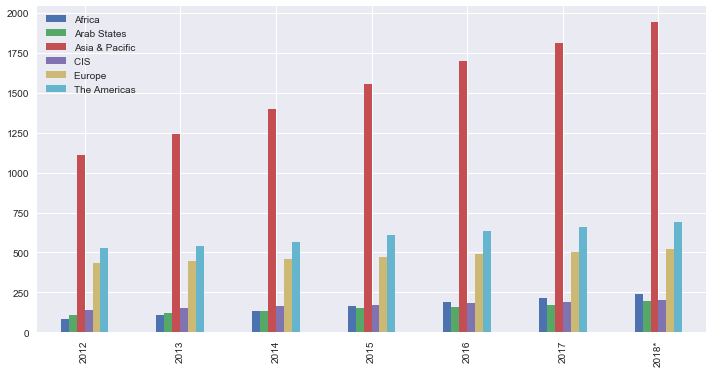

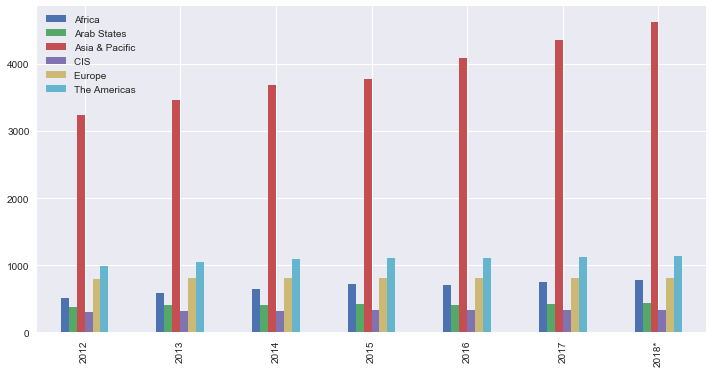

In [27]:
#Visualize dataset - Mobile Users in the world, by regions

df_web_new.plot.bar(figsize=(12,6))

df_mob_new.plot.bar(figsize=(12,6))

plt.show()


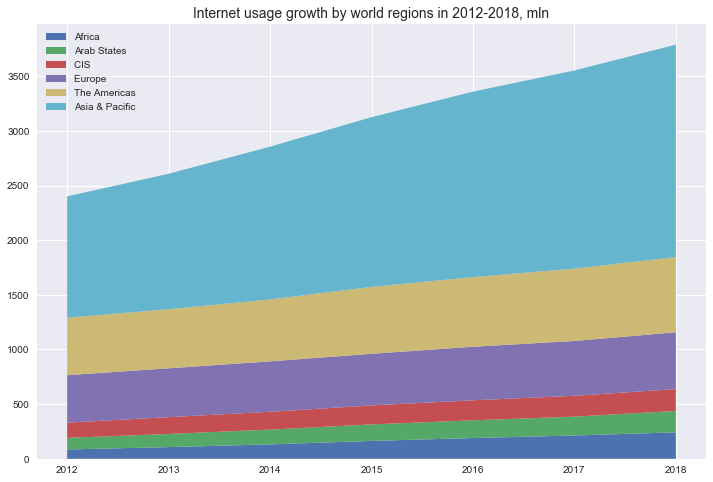

In [28]:
#Visualize dataset, Internet Users 

x = [2012,2013,2014,2015,2016,2017,2018]

fig, ax = plt.subplots(figsize=(12, 8))

labels = ['Africa ', 'Arab States ', 'CIS ', 'Europe ',   'The Americas ', 'Asia & Pacific ']
ax.stackplot(x, df_web_new['Africa '], df_web_new['Arab States '], df_web_new['CIS '], df_web_new['Europe '], 
             df_web_new['The Americas '], df_web_new['Asia & Pacific '], labels = labels )

ax.legend(loc='upper left')
plt.title('Internet usage growth by world regions in 2012-2018, mln', fontsize=14)

plt.show()


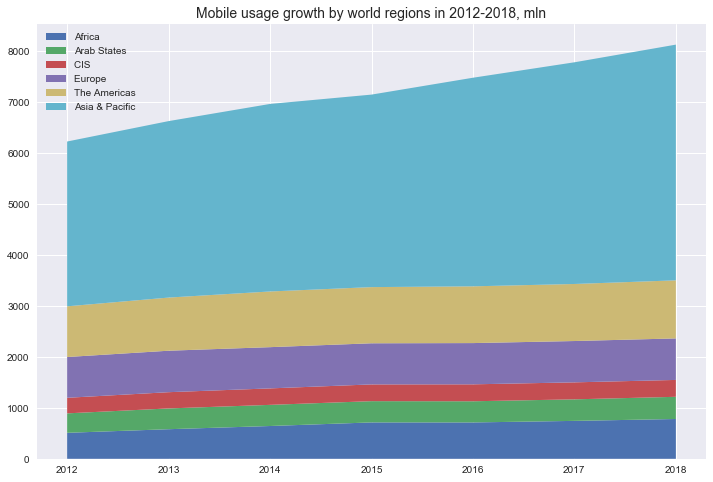

In [29]:
#Visualize dataset - Mobile Users in the world, by regions -2 

x = [2012,2013,2014,2015,2016,2017,2018]


fig, ax = plt.subplots(figsize=(12, 8))

labels = ['Africa ', 'Arab States ', 'CIS ', 'Europe ',   'The Americas ', 'Asia & Pacific ']
ax.stackplot(x, df_mob_new['Africa '], df_mob_new['Arab States '], df_mob_new['CIS '], df_mob_new['Europe '], 
             df_mob_new['The Americas '], df_mob_new['Asia & Pacific '], labels = labels )

ax.legend(loc='upper left')
plt.title('Mobile usage growth by world regions in 2012-2018, mln', fontsize=14)

plt.show()

### Mobile users & Internet users data manipulating

In [30]:
df_mob_new['Number'] = [1,2,3,4,5,6,7]
df_mob_new

,Africa,Arab States,Asia & Pacific,CIS,Europe,The Americas,Number
2012,510.18,381.64,3234.35,305.51,800.41,994.92,1
2013,580.90,407.70,3463.40,318.85,813.83,1042.98,2
2014,643.55,415.03,3680.55,323.19,809.37,1092.86,3
2015,714.16,417.20,3778.08,328.61,807.16,1102.60,4
2016,713.56,415.56,4093.94,332.37,809.58,1113.91,5
2017,744.21,422.70,4350.91,333.42,811.14,1119.54,6
2018*,781.12,435.61,4625.94,331.19,814.81,1139.92,7


In [31]:

x = df_mob_new.Number.values
y = df_mob_new['Africa '].values

coefs = np.polyfit(x,y,deg=1)
print('Coefs:', coefs)

x_values = np.linspace(x.min(), x.max(), num=1592)
y_values = np.polyval(coefs, x_values)

print('x_values:', x_values)
print('y_values:', y_values)


Coefs: [ 43.19464286 496.89      ]
x_values: [1.         1.00377121 1.00754243 ... 6.99245757 6.99622879 7.        ]
y_values: [540.08464286 540.24753906 540.41043526 ... 798.9267076  799.0896038
 799.2525    ]


In [32]:

x = df_mob_new.Number.values
y = df_mob_new['Arab States '].values

coefs = np.polyfit(x,y,deg=1)

y_values = np.polyval(coefs, (np.linspace(x.min(), x.max(), num=1592)))
y_values


array([393.01571429, 393.04163329, 393.0675523 , ..., 434.20101913,
       434.22693813, 434.25285714])

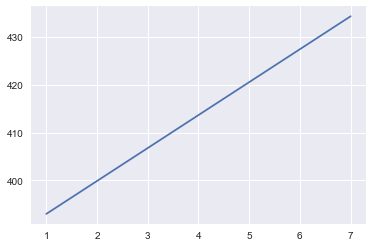

In [33]:
plt.plot(x_values, y_values)
plt.show()

In [34]:
x = df_mob_new.Number.values

def y_values(y):
    coefs = np.polyfit(x,y,deg=1)
    y_values = np.polyval(coefs, (np.linspace(x.min(), x.max(), num=1592)))
    return y_values

Asia_mob_users = y_values(df_mob_new['Asia & Pacific '].values)
Africa__mob_users = y_values(df_mob_new['Africa '].values)
Arab_States__mob_users = y_values(df_mob_new['Arab States '].values)
CIS__mob_users = y_values(df_mob_new['CIS '].values)
Europe__mob_users = y_values(df_mob_new['Europe '].values)
Americas__mob_users = y_values(df_mob_new['The Americas '].values)



In [35]:
df['Asia_mob_users'] = Asia_mob_users.round(1)
df['Africa__mob_users'] = Africa__mob_users.round(1)
df['Arab_States__mob_users'] = Arab_States__mob_users.round(1)
df['CIS__mob_users'] = CIS__mob_users.round(1)
df['Europe__mob_users'] = Europe__mob_users.round(1)
df['Americas__mob_users'] = Americas__mob_users.round(1)
df.head(100)

,Close Apple,Volume Apple,Close Amazon,Volume Amazon,Close FB,Volume FB,Close Google,Volume Google,Close S&P 500,Volume S&P500,...,Market Cap_Google,Market Cap_APPLE,Market Cap_FB,Market Cap_AMZN,Asia_mob_users,Africa__mob_users,Arab_States__mob_users,CIS__mob_users,Europe__mob_users,Americas__mob_users
2013-01-02,78.432854,140129500.0,257.309998,3271000.0,28.000000,69846400.0,359.288177,5115500.0,1462.420044,4.202600e+09,...,238426.3057,515560.3722,66416.0000,116818.7400,3207.8,540.1,393.0,312.4,805.4,1021.4
2013-01-03,77.442856,88241300.0,258.480011,2750900.0,27.770000,63140600.0,359.496826,4666500.0,1459.369995,3.829730e+09,...,238564.7561,509048.9501,65870.4400,117349.9245,3208.7,540.2,393.0,312.4,805.4,1021.5
2013-01-04,75.285713,148583400.0,259.149994,1874200.0,28.760000,72715400.0,366.600616,5562800.0,1466.469971,3.424290e+09,...,243278.8851,494873.3253,68218.7200,117654.1000,3209.5,540.4,393.1,312.4,805.4,1021.6
2013-01-07,74.842857,121039100.0,268.459991,4910000.0,29.420000,83781800.0,365.001007,3332900.0,1461.890015,3.304970e+09,...,242217.3911,491962.3066,69787.3260,121880.4768,3210.4,540.6,393.1,312.4,805.4,1021.7
2013-01-08,75.044289,114676800.0,266.380005,3010700.0,29.059999,45871300.0,364.280701,3373900.0,1457.150024,3.601600e+09,...,241739.3847,493286.3538,68931.9780,120936.5200,3211.3,540.7,393.1,312.4,805.4,1021.7
2013-01-09,73.871429,101901100.0,266.350006,2265600.0,30.590000,104787700.0,366.675140,4075700.0,1461.020020,3.674390e+09,...,243327.6780,485576.8481,72559.4800,120922.9045,3212.1,540.9,393.1,312.5,805.4,1021.8
2013-01-10,74.787140,150286500.0,265.339996,2863400.0,31.299999,95316400.0,368.344269,3695100.0,1472.119995,4.081840e+09,...,244435.9936,491596.0900,74243.6000,120464.3600,3213.0,541.1,393.2,312.5,805.4,1021.9
2013-01-11,74.328575,87626700.0,267.940002,2413300.0,31.719999,89598000.0,367.604095,2587000.0,1472.050049,3.340650e+09,...,243944.8074,488591.8746,75239.8400,121644.7600,3213.8,541.2,393.2,312.5,805.4,1022.0
2013-01-14,71.678574,183551900.0,272.730011,4275000.0,30.950001,98892800.0,359.288177,5765000.0,1470.680054,3.003010e+09,...,238426.3057,471172.3487,73407.4700,123819.4245,3214.7,541.4,393.2,312.5,805.4,1022.1
2013-01-15,69.417145,219193100.0,271.899994,2326900.0,30.100000,173242600.0,360.122742,7906300.0,1472.339966,3.135350e+09,...,238980.1338,456307.0709,71397.2000,123442.6000,3215.5,541.6,393.2,312.5,805.4,1022.1


In [36]:
df_web_new['Number'] = [1,2,3,4,5,6,7]
df_web_new

,Africa,Arab States,Asia & Pacific,CIS,Europe,The Americas,Number
2012,85.26,106.31,1109.67,139.13,434.35,526.12,1
2013,107.24,120.22,1239.01,153.45,446.87,540.60,2
2014,131.83,135.37,1397.24,162.95,461.31,566.78,3
2015,163.79,150.92,1552.23,173.66,472.27,612.23,4
2016,190.11,162.08,1696.88,183.16,489.94,637.05,5
2017,213.33,172.69,1813.02,190.62,501.04,661.90,6
2018*,242.00,196.00,1943.00,200.00,520.00,688.00,7


In [37]:
x = df_web_new.Number.values

def y_values_web(y):
    coefs = np.polyfit(x,y,deg=1)
    y_values_web = np.polyval(coefs, (np.linspace(x.min(), x.max(), num=1592)))
    return y_values_web

Asia_web_users = y_values_web(df_web_new['Asia & Pacific '].values)
Africa__web_users = y_values_web(df_web_new['Africa '].values)
Arab_States__web_users = y_values_web(df_web_new['Arab States '].values)
CIS__web_users = y_values_web(df_web_new['CIS '].values)
Europe__web_users = y_values_web(df_web_new['Europe '].values)
Americas__web_users = y_values_web(df_web_new['The Americas '].values)
print(Asia_web_users)
print(Africa__web_users)

[1112.90178571 1113.43347962 1113.96517352 ... 1957.76339791 1958.29509181
 1958.82678571]
[ 82.57857143  82.67833079  82.77809015 ... 241.09619556 241.19595493
 241.29571429]


In [38]:
df['Asia_web_users'] = Asia_web_users.round(1)
df['Africa__web_users'] = Africa__web_users.round(1)
df['Arab_States__web_users'] = Arab_States__web_users.round(1)
df['CIS__web_users'] = CIS__web_users.round(1)
df['Europe__web_users'] = Europe__web_users.round(1)
df['Americas__web_users'] = Americas__web_users.round(1)
df.head(100)

,Close Apple,Volume Apple,Close Amazon,Volume Amazon,Close FB,Volume FB,Close Google,Volume Google,Close S&P 500,Volume S&P500,...,Arab_States__mob_users,CIS__mob_users,Europe__mob_users,Americas__mob_users,Asia_web_users,Africa__web_users,Arab_States__web_users,CIS__web_users,Europe__web_users,Americas__web_users
2013-01-02,78.432854,140129500.0,257.309998,3271000.0,28.000000,69846400.0,359.288177,5115500.0,1462.420044,4.202600e+09,...,393.0,312.4,805.4,1021.4,1112.9,82.6,106.2,142.2,432.9,519.1
2013-01-03,77.442856,88241300.0,258.480011,2750900.0,27.770000,63140600.0,359.496826,4666500.0,1459.369995,3.829730e+09,...,393.0,312.4,805.4,1021.5,1113.4,82.7,106.2,142.2,433.0,519.2
2013-01-04,75.285713,148583400.0,259.149994,1874200.0,28.760000,72715400.0,366.600616,5562800.0,1466.469971,3.424290e+09,...,393.1,312.4,805.4,1021.6,1114.0,82.8,106.3,142.2,433.0,519.3
2013-01-07,74.842857,121039100.0,268.459991,4910000.0,29.420000,83781800.0,365.001007,3332900.0,1461.890015,3.304970e+09,...,393.1,312.4,805.4,1021.7,1114.5,82.9,106.3,142.3,433.1,519.4
2013-01-08,75.044289,114676800.0,266.380005,3010700.0,29.059999,45871300.0,364.280701,3373900.0,1457.150024,3.601600e+09,...,393.1,312.4,805.4,1021.7,1115.0,83.0,106.4,142.3,433.1,519.5
2013-01-09,73.871429,101901100.0,266.350006,2265600.0,30.590000,104787700.0,366.675140,4075700.0,1461.020020,3.674390e+09,...,393.1,312.5,805.4,1021.8,1115.6,83.1,106.4,142.3,433.2,519.7
2013-01-10,74.787140,150286500.0,265.339996,2863400.0,31.299999,95316400.0,368.344269,3695100.0,1472.119995,4.081840e+09,...,393.2,312.5,805.4,1021.9,1116.1,83.2,106.5,142.4,433.2,519.8
2013-01-11,74.328575,87626700.0,267.940002,2413300.0,31.719999,89598000.0,367.604095,2587000.0,1472.050049,3.340650e+09,...,393.2,312.5,805.4,1022.0,1116.6,83.3,106.5,142.4,433.3,519.9
2013-01-14,71.678574,183551900.0,272.730011,4275000.0,30.950001,98892800.0,359.288177,5765000.0,1470.680054,3.003010e+09,...,393.2,312.5,805.4,1022.1,1117.2,83.4,106.6,142.5,433.3,520.0
2013-01-15,69.417145,219193100.0,271.899994,2326900.0,30.100000,173242600.0,360.122742,7906300.0,1472.339966,3.135350e+09,...,393.2,312.5,805.4,1022.1,1117.7,83.5,106.6,142.5,433.4,520.1


In [39]:
print('DataFrame shape:', df.shape)
print('Null values in data frame:',df.isnull().sum().sum())

DataFrame shape: (1592, 30)
Null values in data frame: 0


In [40]:
df.index = pd.to_datetime(df.index)
df.head()

,Close Apple,Volume Apple,Close Amazon,Volume Amazon,Close FB,Volume FB,Close Google,Volume Google,Close S&P 500,Volume S&P500,...,Arab_States__mob_users,CIS__mob_users,Europe__mob_users,Americas__mob_users,Asia_web_users,Africa__web_users,Arab_States__web_users,CIS__web_users,Europe__web_users,Americas__web_users
2013-01-02,78.432854,140129500.0,257.309998,3271000.0,28.000000,69846400.0,359.288177,5115500.0,1462.420044,4.202600e+09,...,393.0,312.4,805.4,1021.4,1112.9,82.6,106.2,142.2,432.9,519.1
2013-01-03,77.442856,88241300.0,258.480011,2750900.0,27.770000,63140600.0,359.496826,4666500.0,1459.369995,3.829730e+09,...,393.0,312.4,805.4,1021.5,1113.4,82.7,106.2,142.2,433.0,519.2
2013-01-04,75.285713,148583400.0,259.149994,1874200.0,28.760000,72715400.0,366.600616,5562800.0,1466.469971,3.424290e+09,...,393.1,312.4,805.4,1021.6,1114.0,82.8,106.3,142.2,433.0,519.3
2013-01-07,74.842857,121039100.0,268.459991,4910000.0,29.420000,83781800.0,365.001007,3332900.0,1461.890015,3.304970e+09,...,393.1,312.4,805.4,1021.7,1114.5,82.9,106.3,142.3,433.1,519.4
2013-01-08,75.044289,114676800.0,266.380005,3010700.0,29.059999,45871300.0,364.280701,3373900.0,1457.150024,3.601600e+09,...,393.1,312.4,805.4,1021.7,1115.0,83.0,106.4,142.3,433.1,519.5


## Stock prices prediction

### Features engineering

In [41]:
 
#logarithmic transformation of some features

df_logs = df.copy()
for c in  df_logs[['Volume Apple','Volume Amazon', 'Volume FB', 'Volume Google', 'Volume S&P500', 'Volume DJ', 'Volume ND', 'Market Cap_Google', 'Market Cap_APPLE', 'Market Cap_FB',
       'Market Cap_AMZN']] :
    df_logs[c] = np.log(df_logs[c])

df_logs.head()

,Close Apple,Volume Apple,Close Amazon,Volume Amazon,Close FB,Volume FB,Close Google,Volume Google,Close S&P 500,Volume S&P500,...,Arab_States__mob_users,CIS__mob_users,Europe__mob_users,Americas__mob_users,Asia_web_users,Africa__web_users,Arab_States__web_users,CIS__web_users,Europe__web_users,Americas__web_users
2013-01-02,78.432854,18.758078,257.309998,15.000606,28.000000,18.061809,359.288177,15.447786,1462.420044,22.158969,...,393.0,312.4,805.4,1021.4,1112.9,82.6,106.2,142.2,432.9,519.1
2013-01-03,77.442856,18.295586,258.480011,14.827439,27.770000,17.960875,359.496826,15.355920,1459.369995,22.066060,...,393.0,312.4,805.4,1021.5,1113.4,82.7,106.2,142.2,433.0,519.2
2013-01-04,75.285713,18.816657,259.149994,14.443692,28.760000,18.102064,366.600616,15.531612,1466.469971,21.954160,...,393.1,312.4,805.4,1021.6,1114.0,82.8,106.3,142.2,433.0,519.3
2013-01-07,74.842857,18.611624,268.459991,15.406784,29.420000,18.243726,365.001007,15.019353,1461.890015,21.918693,...,393.1,312.4,805.4,1021.7,1114.5,82.9,106.3,142.3,433.1,519.4
2013-01-08,75.044289,18.557628,266.380005,14.917683,29.059999,17.641350,364.280701,15.031580,1457.150024,22.004644,...,393.1,312.4,805.4,1021.7,1115.0,83.0,106.4,142.3,433.1,519.5


## Linear regression model

In [42]:
df_lr = df.copy()
df_lr.head()

,Close Apple,Volume Apple,Close Amazon,Volume Amazon,Close FB,Volume FB,Close Google,Volume Google,Close S&P 500,Volume S&P500,...,Arab_States__mob_users,CIS__mob_users,Europe__mob_users,Americas__mob_users,Asia_web_users,Africa__web_users,Arab_States__web_users,CIS__web_users,Europe__web_users,Americas__web_users
2013-01-02,78.432854,140129500.0,257.309998,3271000.0,28.000000,69846400.0,359.288177,5115500.0,1462.420044,4.202600e+09,...,393.0,312.4,805.4,1021.4,1112.9,82.6,106.2,142.2,432.9,519.1
2013-01-03,77.442856,88241300.0,258.480011,2750900.0,27.770000,63140600.0,359.496826,4666500.0,1459.369995,3.829730e+09,...,393.0,312.4,805.4,1021.5,1113.4,82.7,106.2,142.2,433.0,519.2
2013-01-04,75.285713,148583400.0,259.149994,1874200.0,28.760000,72715400.0,366.600616,5562800.0,1466.469971,3.424290e+09,...,393.1,312.4,805.4,1021.6,1114.0,82.8,106.3,142.2,433.0,519.3
2013-01-07,74.842857,121039100.0,268.459991,4910000.0,29.420000,83781800.0,365.001007,3332900.0,1461.890015,3.304970e+09,...,393.1,312.4,805.4,1021.7,1114.5,82.9,106.3,142.3,433.1,519.4
2013-01-08,75.044289,114676800.0,266.380005,3010700.0,29.059999,45871300.0,364.280701,3373900.0,1457.150024,3.601600e+09,...,393.1,312.4,805.4,1021.7,1115.0,83.0,106.4,142.3,433.1,519.5


In [43]:
#Split on train test sets

train = df_lr[:1200]
test = df_lr[1200:]

print('Total dataset:', df_lr.shape)
print('Train set:', train.shape)
print('Test set:', test.shape)

Total dataset: (1592, 30)
Train set: (1200, 30)
Test set: (392, 30)


In [44]:
#Split on train test sets

train_logs = df_logs[:1200]
test_logs = df_logs[1200:]

print('Total dataset Logs:', df_logs.shape)
print('Train set Logs:', train_logs.shape)
print('Test set Logs:', test_logs.shape)

Total dataset Logs: (1592, 30)
Train set Logs: (1200, 30)
Test set Logs: (392, 30)


### Google stock price prediction

In [48]:
#Linear Regression on raw data

X_train_g = train.drop('Close Google', axis=1)
y_train_g = train['Close Google']

X_test_g = test.drop('Close Google', axis=1)
y_test_g = test['Close Google']

print('X_train Google:', X_train_g.shape, 'y_train Google:', y_train_g.shape)
print('X_test Google:', X_test_g.shape, 'y_test Google:', y_test_g.shape)

X_train Google: (1200, 29) y_train Google: (1200,)
X_test Google: (392, 29) y_test Google: (392,)


(392,)


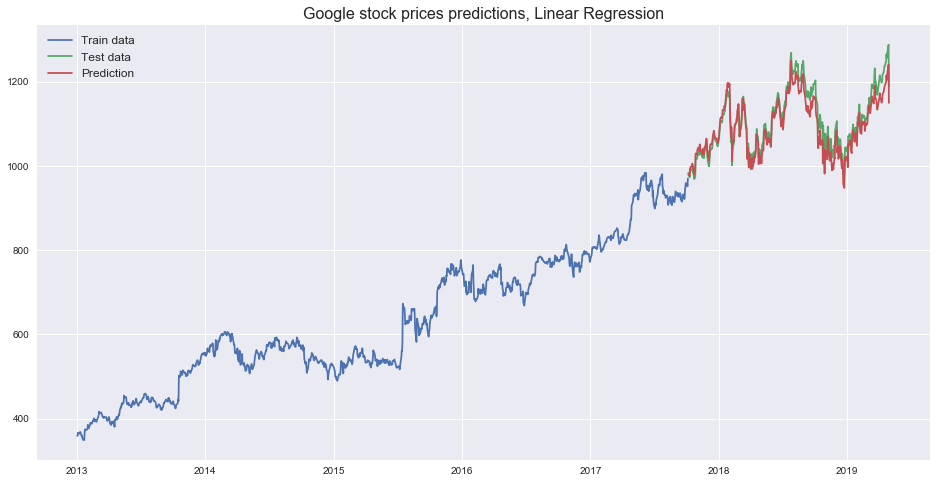

In [49]:
#Linear Regression on raw data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train_g, y_train_g)

pred_g = model.predict(X_test_g)
print(pred_g.shape)

X_test_g['Predictions_Google'] = 0
X_test_g['Predictions_Google'] = pred_g

plt.figure(figsize = (16,8))
plt.plot(train['Close Google'], label='Train data')
plt.plot(test['Close Google'], label='Test data')
plt.plot(X_test_g['Predictions_Google'], label='Prediction')
plt.legend(loc='upper left', fontsize=12)
plt.title('Google stock prices predictions, Linear Regression', fontsize=16)
plt.show()

In [50]:
#Model evaluation

#RMSE

def RMSE(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

RMSE_G = RMSE(y_test_g, pred_g)
print ('RMSE Google: {:.2f}'. format(RMSE_G))

RMSE Google: 23.03


X_train_logs Google: (1200, 29) y_train_logs Google: (1200,)
X_test_logs Google: (392, 29) y_test_logs Google: (392,)
(392,)


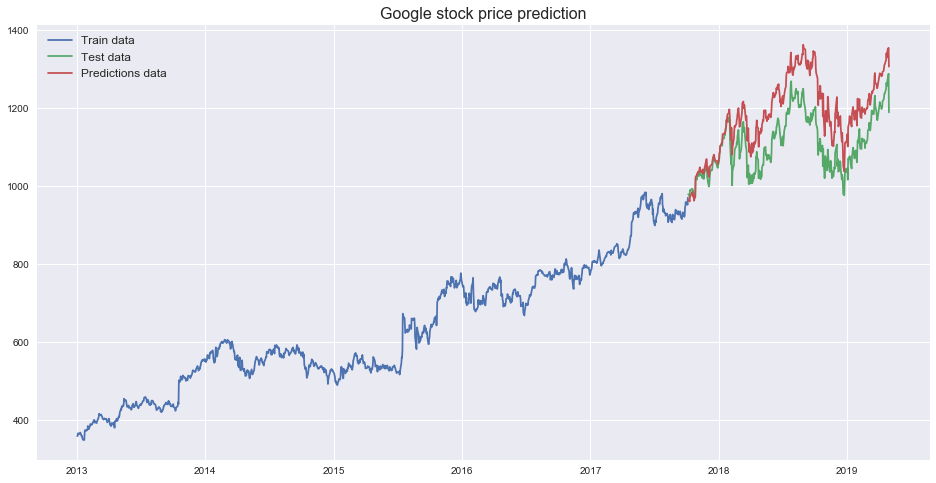

In [51]:

# Linear Regression on Data set with logarithmic transformation on features ('Volume' and 'Market Capitalization')

X_train_g_logs = train_logs.drop('Close Google', axis=1)
y_train_g_logs = train_logs['Close Google']

X_test_g_logs = test_logs.drop('Close Google', axis=1)
y_test_g_logs = test_logs['Close Google']

print('X_train_logs Google:', X_train_g_logs.shape, 'y_train_logs Google:', y_train_g_logs.shape)
print('X_test_logs Google:', X_test_g_logs.shape, 'y_test_logs Google:', y_test_g_logs.shape)

lr_g_logs = model.fit(X_train_g_logs, y_train_g_logs)

pred_g_logs = lr_g_logs.predict(X_test_g_logs)
print(pred_g_logs.shape)

X_test_g_logs['Predictions Google'] = 0
X_test_g_logs['Predictions Google'] = pred_g_logs


#Plot results

plt.figure(figsize = (16,8))
plt.plot(train_logs['Close Google'], label='Train data')
plt.plot(test_logs['Close Google'], label='Test data')
plt.plot(X_test_g_logs['Predictions Google'], label='Predictions data')
plt.title('Google stock price prediction', fontsize=16)
plt.legend(loc = 'upper left', fontsize = 12)

plt.show()

In [52]:
#Model evaluation

#RMSE

RMSE_G_log = RMSE(y_test_g_logs, pred_g_logs)
print ('RMSE Google: {:.2f}'. format(RMSE_G_log))

RMSE Google: 87.12


### Apple stock price prediction

X_train Apple: (1200, 29) y_train Apple: (1200,)
X_test Apple: (392, 29) y_test Apple: (392,)
(392,)


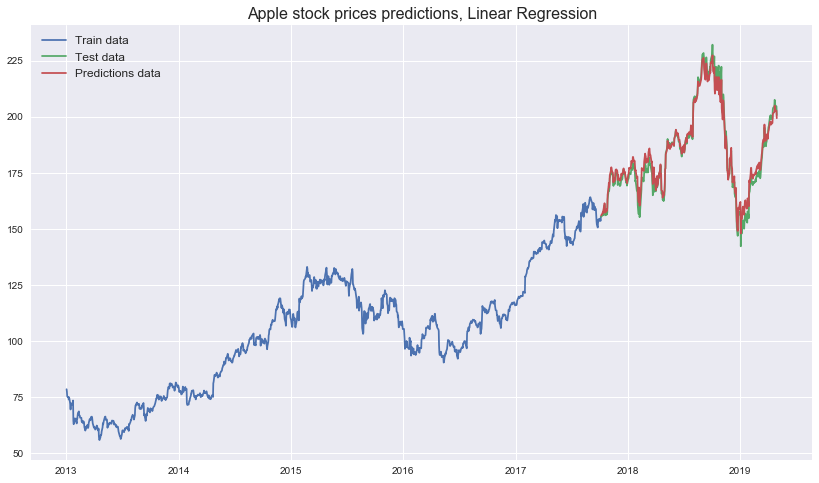

In [55]:

X_train_ap = train.drop('Close Apple', axis=1)
y_train_ap = train['Close Apple']

X_test_ap = test.drop('Close Apple', axis=1)
y_test_ap = test['Close Apple']

print('X_train Apple:', X_train_ap.shape, 'y_train Apple:', y_train_ap.shape)
print('X_test Apple:', X_test_ap.shape, 'y_test Apple:', y_test_ap.shape)

model.fit(X_train_ap, y_train_ap)

pred_ap = model.predict(X_test_ap)
print(pred_ap.shape)

X_test_ap['Predictions Apple'] = 0
X_test_ap['Predictions Apple'] = pred_ap

plt.figure(figsize = (14,8))
plt.plot(train['Close Apple'], label = 'Train data')
plt.plot(test['Close Apple'], label = 'Test data')
plt.plot(X_test_ap['Predictions Apple'], label = 'Predictions data')

plt.legend(fontsize=12)
plt.title('Apple stock prices predictions, Linear Regression', fontsize=16)
plt.show()

In [56]:
#Model evaluation

#RMSE

RMSE_AP = RMSE(y_test_ap, pred_ap)
print ('RMSE Apple: {:.2f}'. format(RMSE_AP))


RMSE Apple: 2.93


X_train_logs Apple: (1200, 29) y_train_logs Apple: (1200,)
X_test_logs Apple: (392, 29) y_test_logs Apple: (392,)
(392,)


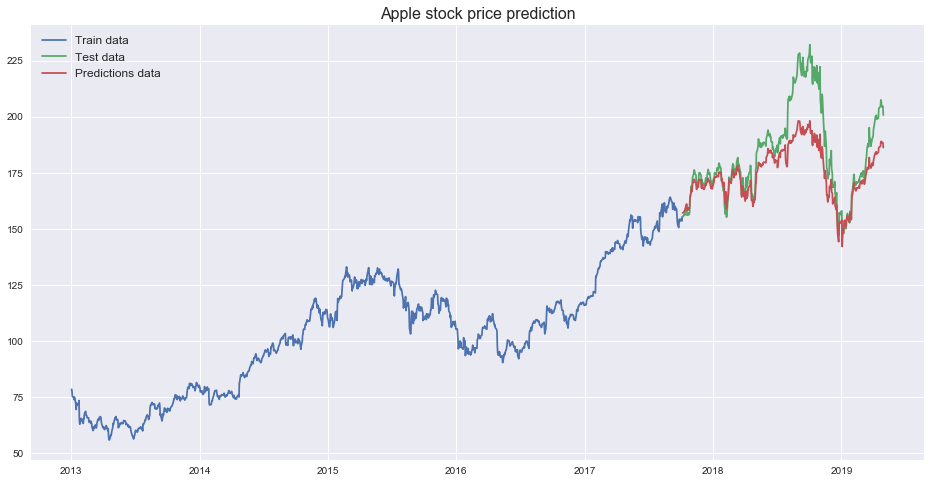

In [59]:
# Linear Regression on Data set with logarithmic transformation on features ('Volume' and 'Market Capitalization')


X_train_ap_logs = train_logs.drop('Close Apple', axis=1)
y_train_ap_logs = train_logs['Close Apple']

X_test_ap_logs = test_logs.drop('Close Apple', axis=1)
y_test_ap_logs = test_logs['Close Apple']

print('X_train_logs Apple:', X_train_ap_logs.shape, 'y_train_logs Apple:', y_train_ap_logs.shape)
print('X_test_logs Apple:', X_test_ap_logs.shape, 'y_test_logs Apple:', y_test_ap_logs.shape)

lr_ap_logs = model.fit(X_train_ap_logs, y_train_ap_logs)

pred_ap_logs = lr_ap_logs.predict(X_test_ap_logs)
print(pred_ap_logs.shape)

X_test_ap_logs['Predictions Apple'] = 0
X_test_ap_logs['Predictions Apple'] = pred_ap_logs


#Plot results
plt.figure(figsize = (16,8))
plt.plot(train_logs['Close Apple'], label='Train data')
plt.plot(test_logs['Close Apple'], label='Test data')
plt.plot(X_test_ap_logs['Predictions Apple'], label='Predictions data')
plt.title('Apple stock price prediction', fontsize=16)
plt.legend(loc = 'upper left', fontsize = 12)

plt.show()

In [60]:
#Model evaluation

#RMSE

RMSE_AP_log = RMSE(y_test_ap_logs, pred_ap_logs)
print ('RMSE APPLE-2: {:.2f}'. format(RMSE_AP_log))

RMSE APPLE-2: 13.04


### Facebook stock price prediction

x_train FB: (1200, 29) y_train FB: (1200,)
x_test FB: (392, 29) y_test FB: (392,)
Predictions shape: (392,)


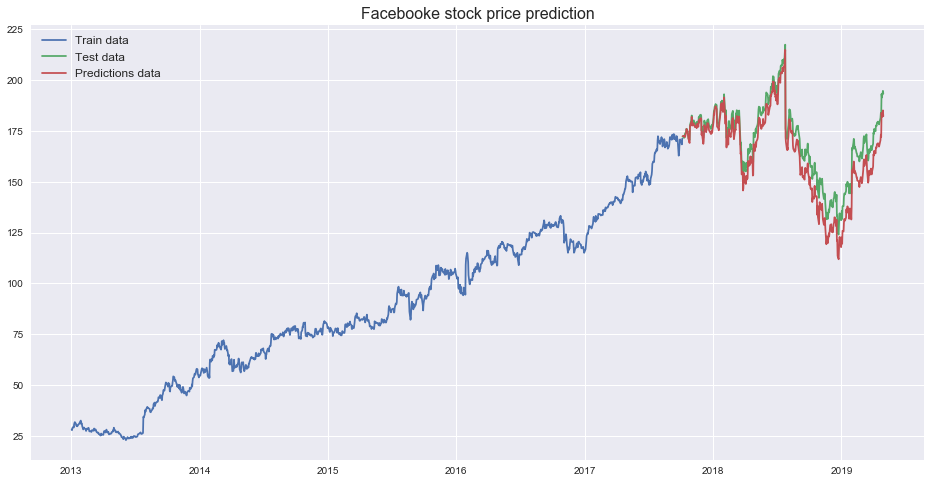

In [62]:
#Linear Regression on raw data

X_train_f = train.drop('Close FB', axis=1)
y_train_f = train['Close FB']

X_test_f = test.drop('Close FB', axis=1)
y_test_f = test['Close FB']

print('x_train FB:', X_train_f.shape, 'y_train FB:', y_train_f.shape)
print('x_test FB:', X_test_f.shape, 'y_test FB:', y_test_f.shape)

model.fit(X_train_f, y_train_f)

pred_f = model.predict(X_test_f)
print('Predictions shape:', pred_f.shape)

X_test_f['Predictions FB'] = 0
X_test_f['Predictions FB'] = pred_f

plt.figure(figsize = (16,8))
plt.plot(train['Close FB'], label='Train data')
plt.plot(test['Close FB'], label='Test data')
plt.plot(X_test_f['Predictions FB'], label='Predictions data')

plt.title('Facebooke stock price prediction', fontsize=16)
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

In [63]:
#Model evaluation

#RMSE

RMSE_F = RMSE(y_test_f, pred_f)
print ('RMSE Facebook: {:.2f}'. format(RMSE_F))

RMSE Facebook: 8.13


X_train_logs FB: (1200, 29) y_train_logs FB: (1200,)
X_test_logs FB: (392, 29) y_test_logs FB: (392,)
(392,)


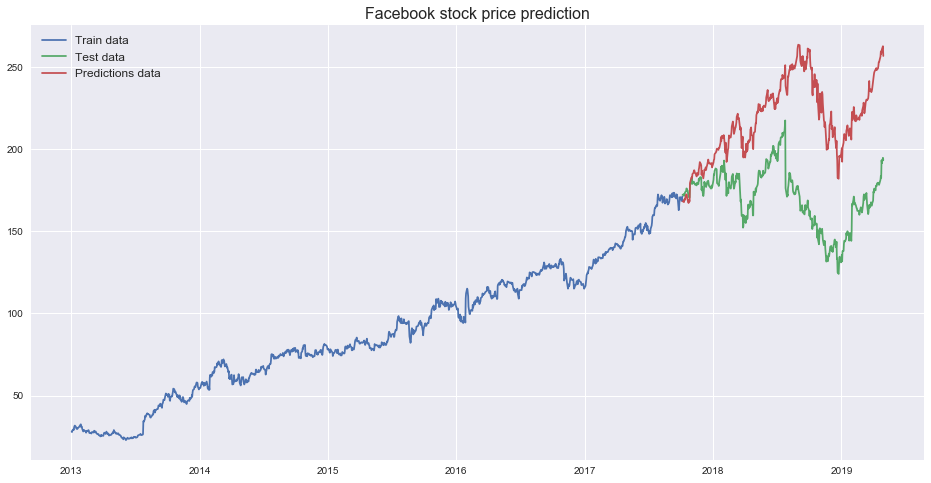

In [64]:
# Linear Regression on Data set with logarithmic transformation on features ('Volume' and 'Market Capitalization')


X_train_f_logs = train_logs.drop('Close FB', axis=1)
y_train_f_logs = train_logs['Close FB']

X_test_f_logs = test_logs.drop('Close FB', axis=1)
y_test_f_logs = test_logs['Close FB']

print('X_train_logs FB:', X_train_f_logs.shape, 'y_train_logs FB:', y_train_f_logs.shape)
print('X_test_logs FB:', X_test_f_logs.shape, 'y_test_logs FB:', y_test_f_logs.shape)

lr_f_logs = model.fit(X_train_f_logs, y_train_f_logs)

pred_f_logs = lr_f_logs.predict(X_test_f_logs)
print(pred_f_logs.shape)

X_test_f_logs['Predictions FB'] = 0
X_test_f_logs['Predictions FB'] = pred_f_logs


#Plot results
plt.figure(figsize = (16,8))
plt.plot(train_logs['Close FB'], label='Train data')
plt.plot(test_logs['Close FB'], label='Test data')
plt.plot(X_test_f_logs['Predictions FB'], label='Predictions data')
plt.title('Facebook stock price prediction', fontsize=16)
plt.legend(loc = 'upper left', fontsize = 12)

plt.show()

In [65]:
#Model evaluation

#RMSE

RMSE_F_log = RMSE(y_test_f_logs, pred_f_logs)
print ('RMSE Facebook_2: {:.2f}'. format(RMSE_F_log))

RMSE Facebook_2: 54.83


### Amazon stock price prediction

X_train Amazon: (1200, 29) y_train Amazon: (1200,)
X_test Amazon: (392, 29) y_test Amazon: (392,)
Predictions shape: (392,)


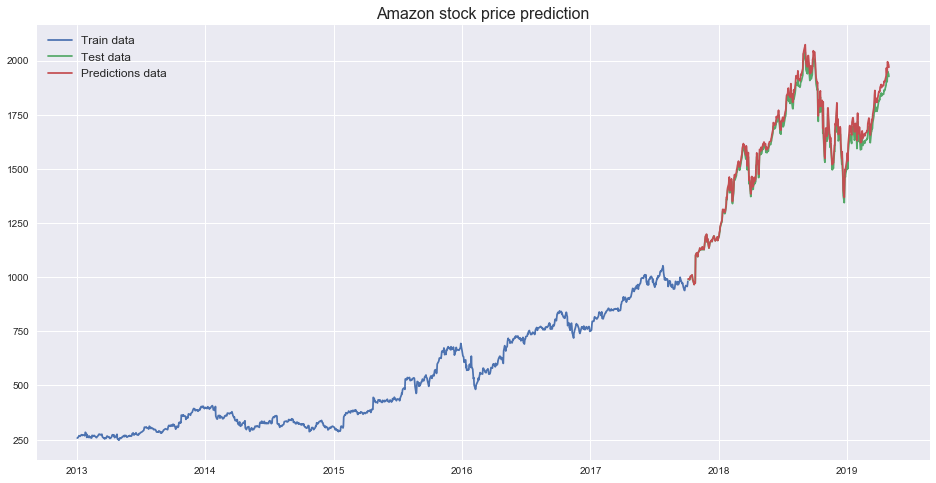

In [66]:
#Linear Regression on raw data

X_train_am = train.drop('Close Amazon', axis=1)
y_train_am = train['Close Amazon']

X_test_am = test.drop('Close Amazon', axis=1)
y_test_am = test['Close Amazon']

print('X_train Amazon:', X_train_am.shape, 'y_train Amazon:', y_train_am.shape)
print('X_test Amazon:', X_test_am.shape, 'y_test Amazon:', y_test_am.shape)

model.fit(X_train_am, y_train_am)

pred_am = model.predict(X_test_am)
print('Predictions shape:', pred_am.shape)

X_test_am['Predictions Amazon'] = 0
X_test_am['Predictions Amazon'] = pred_am

plt.figure(figsize = (16,8))
plt.plot(train['Close Amazon'], label='Train data')
plt.plot(test['Close Amazon'], label='Test data')
plt.plot(X_test_am['Predictions Amazon'], label='Predictions data')

plt.title('Amazon stock price prediction', fontsize=16)
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

In [67]:
#Model evaluation

#RMSE

RMSE_AM = RMSE(y_test_am, pred_am)
print ('RMSE Amazon: {:.2f}'. format(RMSE_AP))

RMSE Amazon: 2.93


X_train_logs Amazon: (1200, 29) y_train_logs Amazon: (1200,)
X_test_logs Amazon: (392, 29) y_test_logs Amazon: (392,)
(392,)


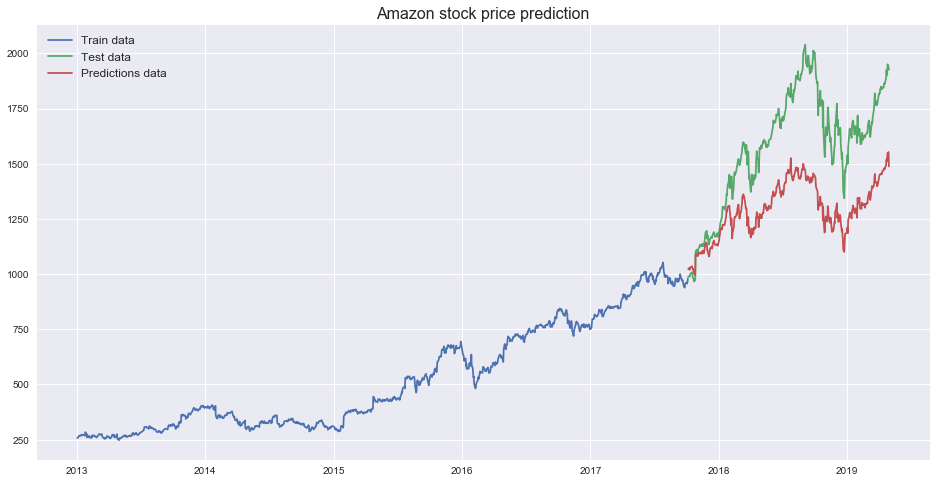

In [68]:
# Linear Regression on Data set with logarithmic transformation on features ('Volume' and 'Market Capitalization')


X_train_am_logs = train_logs.drop('Close Amazon', axis=1)
y_train_am_logs = train_logs['Close Amazon']

X_test_am_logs = test_logs.drop('Close Amazon', axis=1)
y_test_am_logs = test_logs['Close Amazon']

print('X_train_logs Amazon:', X_train_am_logs.shape, 'y_train_logs Amazon:', y_train_am_logs.shape)
print('X_test_logs Amazon:', X_test_am_logs.shape, 'y_test_logs Amazon:', y_test_am_logs.shape)

lr_am_logs = model.fit(X_train_am_logs, y_train_am_logs)

pred_am_logs = lr_am_logs.predict(X_test_am_logs)
print(pred_am_logs.shape)


X_test_am_logs['Predictions Amazon'] = pred_am_logs


#Plot results
plt.figure(figsize = (16,8))
plt.plot(train_logs['Close Amazon'], label='Train data')
plt.plot(test_logs['Close Amazon'], label='Test data')
plt.plot(X_test_am_logs['Predictions Amazon'], label='Predictions data')
plt.title('Amazon stock price prediction', fontsize=16)
plt.legend(loc = 'upper left', fontsize = 12)

plt.show()

In [69]:
#Model evaluation

#RMSE

RMSE_AM_log = RMSE(y_test_am_logs, pred_am_logs)
print ('RMSE Amazon_2: {:.2f}'. format(RMSE_AM_log))

RMSE Amazon_2: 320.98


## KNN

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
from sklearn.neighbors import KNeighborsRegressor  #regression for continious data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [73]:
pipe = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(0,1))),
    ('knn', KNeighborsRegressor())
])

grid = {
    'knn__n_neighbors': [1,2,3,4,5,6,7,8,9,10]
}

grid_cv = GridSearchCV(pipe, grid, cv=5)

grid_cv.fit(X_train_g, y_train_g)

df_knn_g = pd.DataFrame.from_items([
    ('k', grid_cv.cv_results_['param_knn__n_neighbors']),
    
    ('mean_te', grid_cv.cv_results_['mean_test_score'])
])
df_knn_g.sort_values(by='mean_te', ascending=False).head(20)

,k,mean_te
0,1,-1.987111
1,2,-2.043801
2,3,-2.053555
3,4,-2.117814
4,5,-2.181250
5,6,-2.265682
6,7,-2.342256
7,8,-2.398410
8,9,-2.461378
9,10,-2.508162


In [ ]:
#grid_cv.score(X_test_g, y_test_g)


In [76]:
X_test_g = test.drop('Close Google', axis=1)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsRegressor())
])

grid = {
    'knn__n_neighbors': [2,3,4,5,6,7,8],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2],
    'pca__n_components': [2, 5, 10]
}

grid_cv = GridSearchCV(pipe, grid, cv=5)

grid_cv.fit(X_train_g, y_train_g)

pred_g_knn = grid_cv.predict(X_test_g)


In [77]:
df_knn_g = pd.DataFrame.from_items([
    ('k', grid_cv.cv_results_['param_knn__n_neighbors']),
    ('p', grid_cv.cv_results_['param_knn__p']),
    ('weights', grid_cv.cv_results_['param_knn__weights']),
    ('PCA n_components', grid_cv.cv_results_['param_pca__n_components']),
    ('mean_te', grid_cv.cv_results_['mean_test_score'])
])
df_knn_g.sort_values(by='mean_te', ascending=False).head(20)

,k,p,weights,PCA n_components,mean_te
10,2,2,distance,5,-2.601733
7,2,2,uniform,5,-2.621836
22,3,2,distance,5,-2.657853
19,3,2,uniform,5,-2.695714
34,4,2,distance,5,-2.704087
31,4,2,uniform,5,-2.739939
46,5,2,distance,5,-2.740155
43,5,2,uniform,5,-2.780440
58,6,2,distance,5,-2.795328
55,6,2,uniform,5,-2.842837


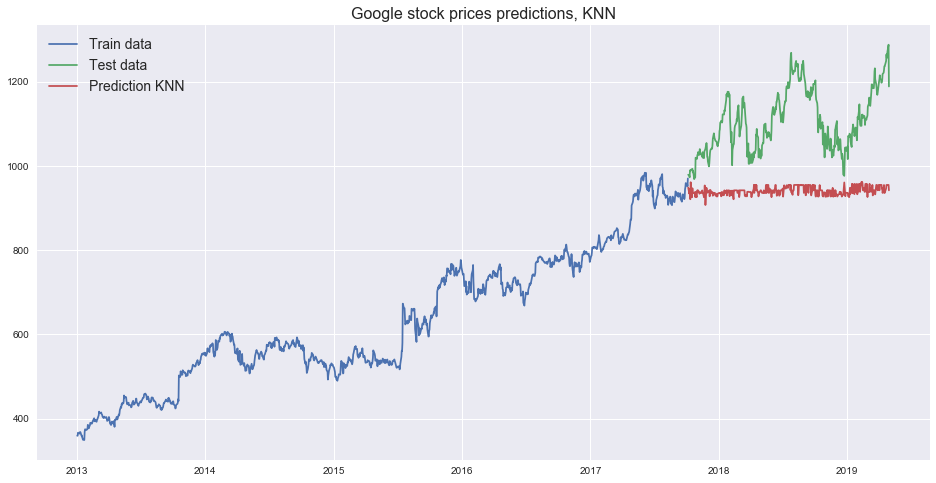

In [78]:
x_test_g['Predictions_Google'] = pred_g_knn
x_test_g['Predictions_Google'].shape


plt.figure(figsize = (16,8))
plt.plot(train['Close Google'], label='Train data')
plt.plot(test['Close Google'], label='Test data')
plt.plot(x_test_g['Predictions_Google'], label='Prediction KNN')
plt.legend(loc='upper left', fontsize=14)
plt.title('Google stock prices predictions, KNN', fontsize=16)
plt.show()

In [79]:
RMSE_g_knn = RMSE(y_test_g, pred_g_knn)
RMSE_g_knn

180.2573088029683

In [80]:
X_train_g_logs = train_logs.drop('Close Google', axis=1)
y_train_g_logs = train_logs['Close Google']

X_test_g_logs = test_logs.drop('Close Google', axis=1)
y_test_g_logs = test_logs['Close Google']

In [82]:
grid_cv.fit(X_train_g_logs, y_train_g_logs)

pred_g_knn_logs = grid_cv.predict(X_test_g_logs)


df_knn_g_logs = pd.DataFrame.from_items([
    ('k', grid_cv.cv_results_['param_knn__n_neighbors']),
    ('p', grid_cv.cv_results_['param_knn__p']),
    ('weights', grid_cv.cv_results_['param_knn__weights']),
    ('PCA n_components', grid_cv.cv_results_['param_pca__n_components']),
    ('mean_te', grid_cv.cv_results_['mean_test_score'])
])
df_knn_g_logs.sort_values(by='mean_te', ascending=False).head(20)

,k,p,weights,PCA n_components,mean_te
10,2,2,distance,5,-2.609064
34,4,2,distance,5,-2.614135
7,2,2,uniform,5,-2.623495
22,3,2,distance,5,-2.627960
31,4,2,uniform,5,-2.640999
46,5,2,distance,5,-2.650683
19,3,2,uniform,5,-2.658574
43,5,2,uniform,5,-2.679106
58,6,2,distance,5,-2.689104
23,3,2,distance,10,-2.702175


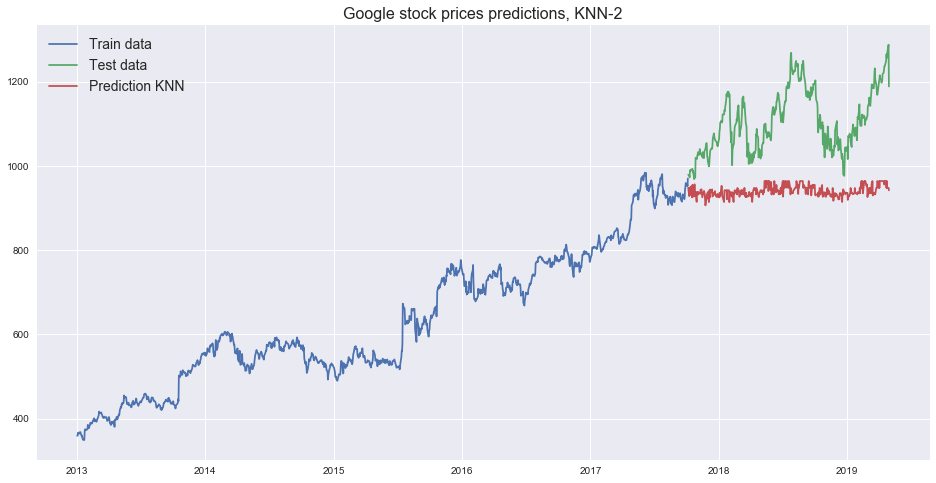

In [83]:
X_test_g_logs['Predictions_Google'] = pred_g_knn_logs
X_test_g_logs['Predictions_Google'].shape


plt.figure(figsize = (16,8))
plt.plot(train_logs['Close Google'], label='Train data')
plt.plot(test_logs['Close Google'], label='Test data')
plt.plot(X_test_g_logs['Predictions_Google'], label='Prediction KNN')
plt.legend(loc='upper left', fontsize=14)
plt.title('Google stock prices predictions, KNN-2', fontsize=16)
plt.show()

In [84]:
RMSE_g_knn_logs = RMSE(y_test_g_logs, pred_g_knn_logs)
RMSE_g_knn_logs

179.7863606757702

In [ ]:
#to be continued

## Prophet


In [85]:
from fbprophet import Prophet

In [86]:
df_prophet = df.copy()
df_prophet = df_prophet.reset_index()
df_prophet_g = df_prophet[['index', 'Close Google']]
df_prophet_g.head()

df_prophet_g.rename(columns={'index': 'ds', 'Close Google': 'y'}, inplace=True)
df_prophet_g.head()

C:\Users\User1\Anaconda3\envs\exts-aml2\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,ds,y
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-07,365.001007
4,2013-01-08,364.280701


In [87]:
train_prophet_g = df_prophet_g[:1200]
test_prophet_g = df_prophet_g[1200:]
print('Train set:',train_prophet_g.shape)
print('Test set:',test_prophet_g.shape)


#Fit the model
g_prophet = Prophet(daily_seasonality=True)
g_prophet.fit(train_prophet_g)

#Prediction
g_forecast = g_prophet.make_future_dataframe(periods=365, freq='D') 
g_forecast = g_prophet.predict(g_forecast)

Train set: (1200, 2)
Test set: (392, 2)


C:\Users\User1\Anaconda3\envs\exts-aml2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


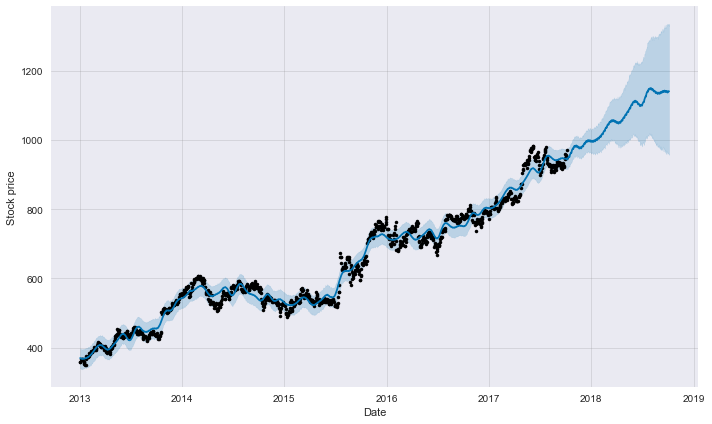

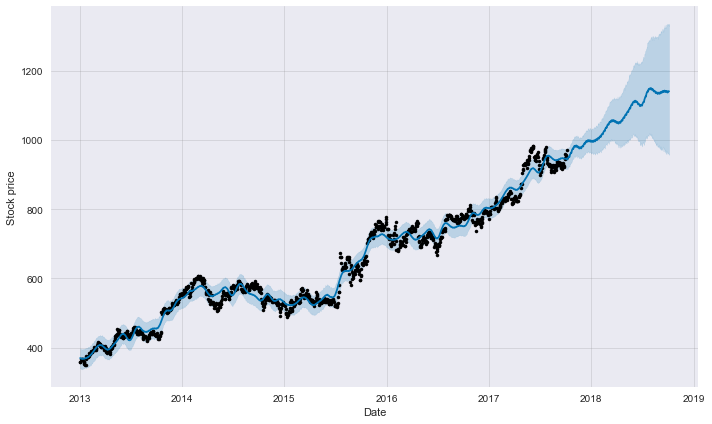

In [89]:

g_prophet.plot(g_forecast, xlabel = 'Date', ylabel = 'Stock price')


In [ ]:
forecast_test_2 = g_forecast['yhat']


In [ ]:
#to be continued